# Business Case 
YULU - HYPOTHESIS TESTING

PROBLEM STATEMENT:
1. Analysing, which of the variables are significant in predicting the demand for shared electric cycles in the Indian market?
2. How well those variables describe the electric cycle demands.

EXPLORATORY DATA ANALYSIS:

In [1]:
# Importing the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math 
import scipy.stats as st

In [7]:
# Loading the Yulu File
yulu = pd.read_csv('yulu.txt')
yulu.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
# Analysing the Meta data
yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
# shape of dataframe
yulu.shape

(10886, 12)

In [114]:
# Missing value detection
yulu.isna().sum().sum()

0

Observations:
1. Yulu is a company about rental electriv bikes.
2. Yulu dataset contains data about different features, ranging from count of users split between casual and registered, to features like wheather, working day, temperature, humidity etc.
3. The Dataset has 10886 entries, of which none of the features have any missing values.
4. There are in total 12 features, of which few are numerical and others are categorical, but most of the categorical features have also been converted to integers for ease of calculations, also one of the feature is a datatimestamp.
5. The Shape of the dataset is (10886,12).

In [12]:
# Analysing each feature 
# Converting each feature to appropriate datatype for better analysis
yulu.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2012-03-13 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [18]:
# Converting Datetime to type Datetime
yulu['datetime'] = pd.to_datetime(yulu['datetime'])

In [33]:
# Converting appropriate columns to Category type
columns=['season','holiday','workingday','weather'] 
yulu[columns]=yulu[columns].astype('category')
yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [35]:
# let's see the Dataframe's proper statistical summary
yulu.describe(include='all',datetime_is_numeric=True)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,NaN,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2011-12-27 05:56:22.399411968,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Observations:
1. For the feature Season, Season 4 is the most frequent, and there are in total 4 unique seasons.
2. For the feature Holiday, there are 10575 days with no holidays from a total of 10886.
3. For the feature Workingday, there are 7412 working days, rest are either weekend or holidays.
4. For the feature Weather, weather type 1 is the most frequent with 4 unique weather types.
5. For the numerical feature Temp, mean is 20.23, median is 20.50, signifying robustness of the data, with a standard deviation of 7.8, in celcius, with minimum temperature as 0.82 and maximum as 41.
6. For the numerical feature aTemp, mean is 23.65, median is 24.24, signifying robustness of the data, with a standard deviation of 8.4, in celcius, with minimum temperature as 0.76 and maximum as 45.45.
7. For the numerical feature Humidity, mean is 61.88, median is 62, signifying robustness of the data, with a standard deviation of 19.24, with minimum value as 0 and maximum as 100.
8. For the numerical feature Windspeed, mean is 12.9, median is 13, signifying robustness of the data, with a standard deviation of 8.2, with minimum windspeed as 0 and maximum as 56.99.
9. For the numerical feature Casual, mean is 36, median is 17, signifying weakness of the data, with a standard deviation of 49, with minimum count as 0 and maximum as 367.
10. For the numerical feature Registered, mean is 155, median is 118, signifying weakness of the data, with a standard deviation of 151, with minimum count as 0 and maximum as 886.
11. For the numerical feature Count, mean is 191, median is 141, signifying weakness of the data, with a standard deviation of 181, with minimum count as 0 and maximum as 977.
12. For the Datetime feature, the starting date is 2011-01-01 00:00:00 and it goes till 2012-12-19 23:00:00, spanning almost 2 years.

### UNIVARIATE ANALYSIS

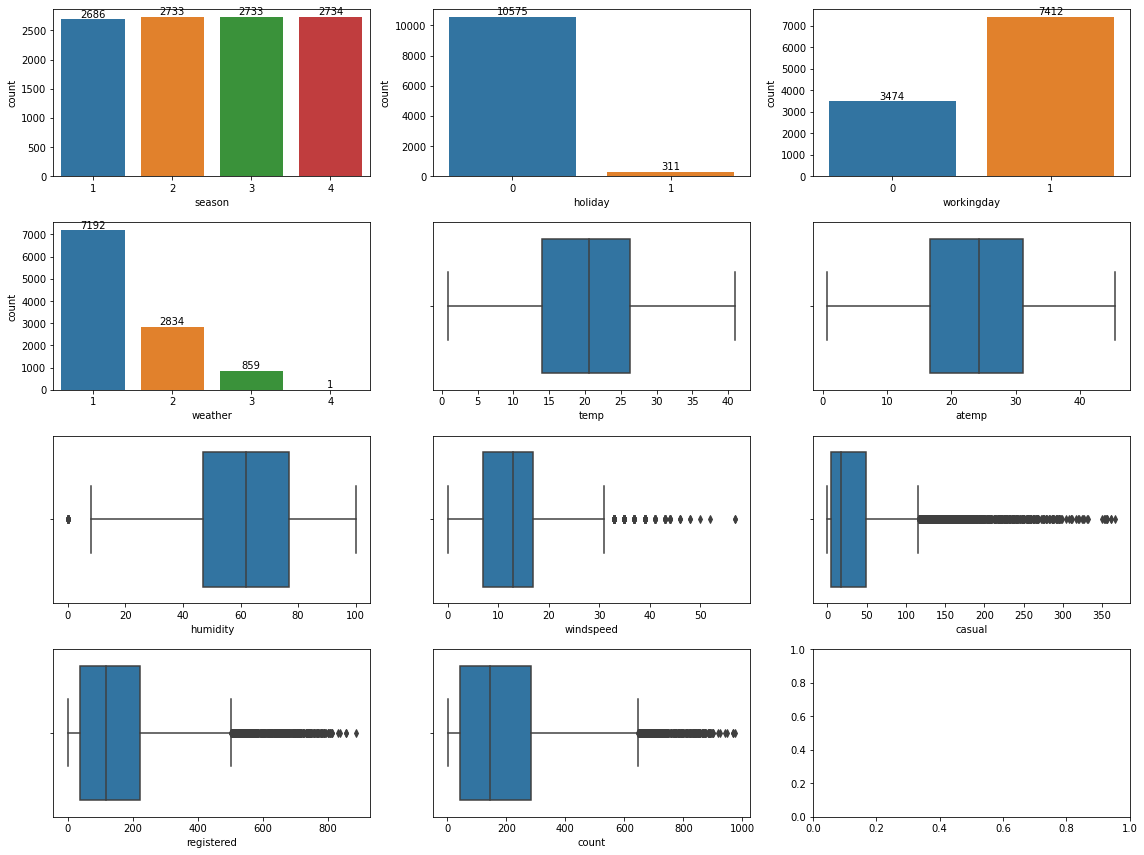

In [112]:
# Plotting the corresponding univariate graph for each feature
plt.subplots(4,3,figsize=(16,12))
pos = 0
for feat in yulu.columns:
    if feat=='datetime':
        continue
    pos += 1
    if yulu[feat].dtype == 'int' or yulu[feat].dtype == 'float':
        plt.subplot(4,3,pos)
        ax = sb.boxplot(data=yulu,x=feat)
        
    else:
        plt.subplot(4,3,pos)
        ax = sb.countplot(data=yulu,x=feat)
        plt.bar_label(ax.containers[0], label_type='edge')
plt.tight_layout()
plt.show()

Observations:
Apart from the earlier stated observations, some new things which have come to light are:
1. The Four season types are almost equal in number.
2. Weather type 4 is only 1 in number
3. Humidity, windspeed, casual counts, registered counts, and over all counts have legitimate outliers.

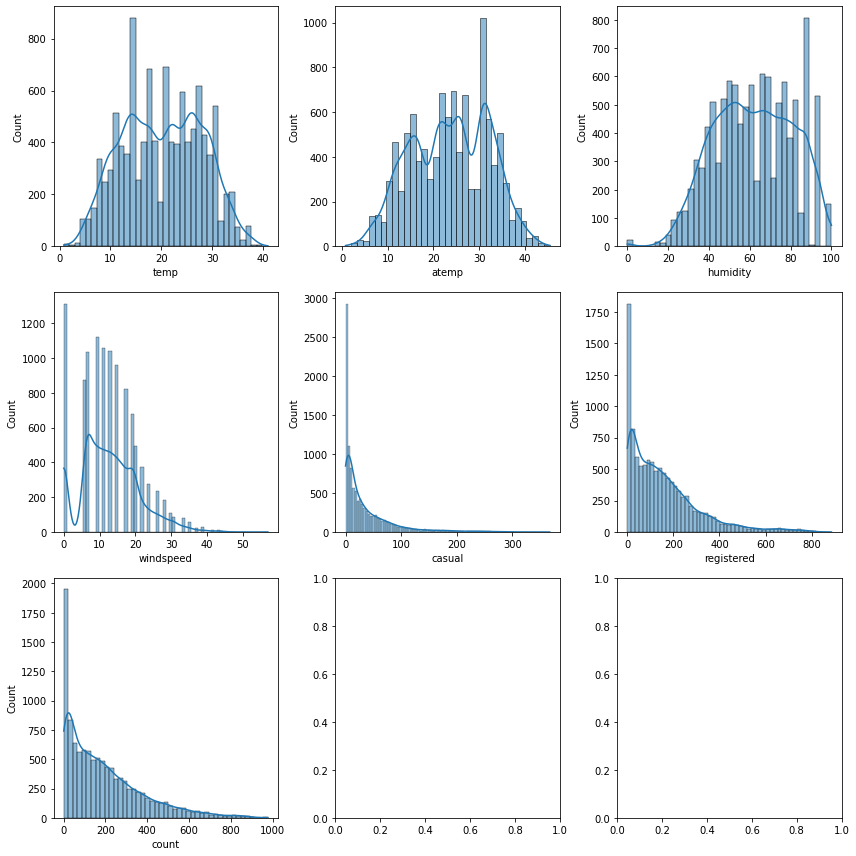

In [135]:
# Plotting the corresponding univariate graph for each feature
plt.subplots(3,3,figsize=(12,12))
pos = 0
for feat in yulu.columns:
    if yulu[feat].dtype == 'int' or yulu[feat].dtype == 'float':
        pos += 1
        plt.subplot(3,3,pos)
        ax = sb.histplot(data=yulu,x=feat,kde=True)
        
#     else:
#         plt.subplot(4,3,pos)
#         ax = sb.countplot(data=yulu,x=feat)
#         plt.bar_label(ax.containers[0], label_type='edge')
plt.tight_layout()
plt.show()

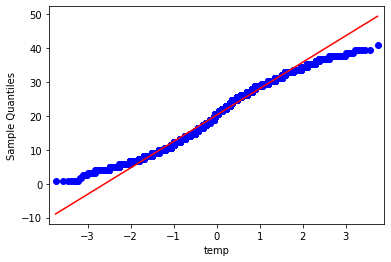

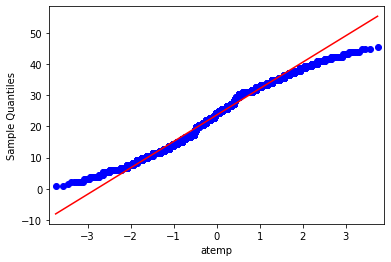

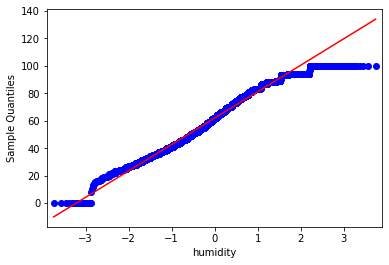

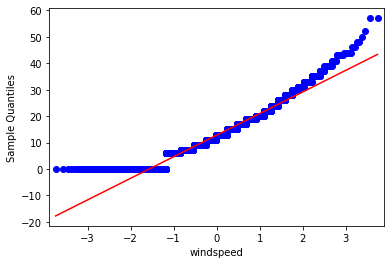

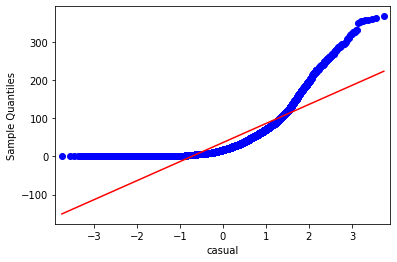

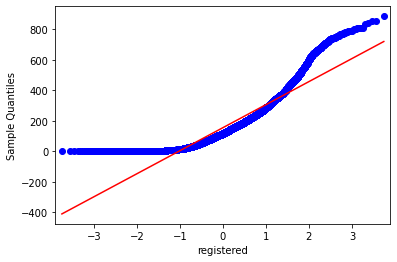

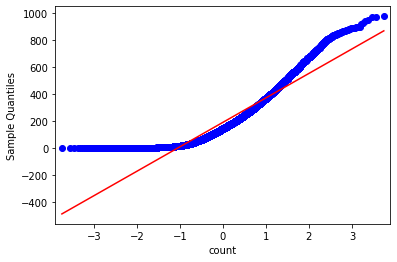

In [200]:
# Plotting the corresponding QQ Plots for each feature
import statsmodels.api as sm
for feat in num_cols:
    sm.qqplot(yulu[feat],line='s')
    plt.xlabel(feat)


Observations:
1. Casual, Registered and Count features somewhat look like Log Normal Distribution, but not at all a normal distribution.
2. Temp, atemp and humidity look somewhat like they follow the Normal Distribution.
3. Windspeed follows the binomial distribution.

### BIVARIATE ANALYSIS

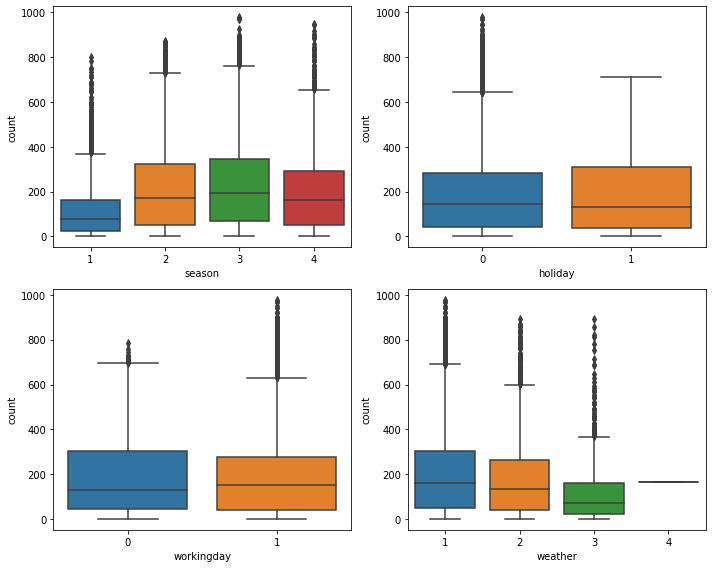

In [178]:
# plotting categorical variables againt count using boxplots
cat_cols= yulu.select_dtypes('category').columns
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
index = 0
for row in range(2):
    for col in range(2):
        sb.boxplot(data=yulu, x=cat_cols[index], y='count', ax=axis[row,col])
        index += 1
plt.tight_layout()
plt.show()

In [173]:
for i in cat_cols:
    print(f'{i.capitalize()} vs Count:')
    print(yulu.groupby(i)['count'].describe())
    print('\n\n')

Season vs Count:
         count        mean         std  min   25%    50%    75%    max
season                                                                
1       2686.0  116.343261  125.273974  1.0  24.0   78.0  164.0  801.0
2       2733.0  215.251372  192.007843  1.0  49.0  172.0  321.0  873.0
3       2733.0  234.417124  197.151001  1.0  68.0  195.0  347.0  977.0
4       2734.0  198.988296  177.622409  1.0  51.0  161.0  294.0  948.0



Holiday vs Count:
           count        mean         std  min   25%    50%    75%    max
holiday                                                                 
0        10575.0  191.741655  181.513131  1.0  43.0  145.0  283.0  977.0
1          311.0  185.877814  168.300531  1.0  38.5  133.0  308.0  712.0



Workingday vs Count:
             count        mean         std  min   25%    50%    75%    max
workingday                                                                
0           3474.0  188.506621  173.724015  1.0  44.0  128.0  304.0  7

Observations:
1. In summer(2) and fall(3) seasons, more bikes are rented as compared to other seasons.
2. It seems, whenever its not a holiday more bikes are rented.
3. It also seems, from the workingday, that whenever day is not holiday or weekend, slightly more bikes were rented, hence complimenting our previous analysis.
4. Whenever there is rain, thunderstorm, snow or fog, ie, weather type 4, there were almost no bikes rented, and on the contrary, on Clear, Few clouds, partly cloudy, partly cloudy days, ie, weather type 1, maximum number of bikes were rented.

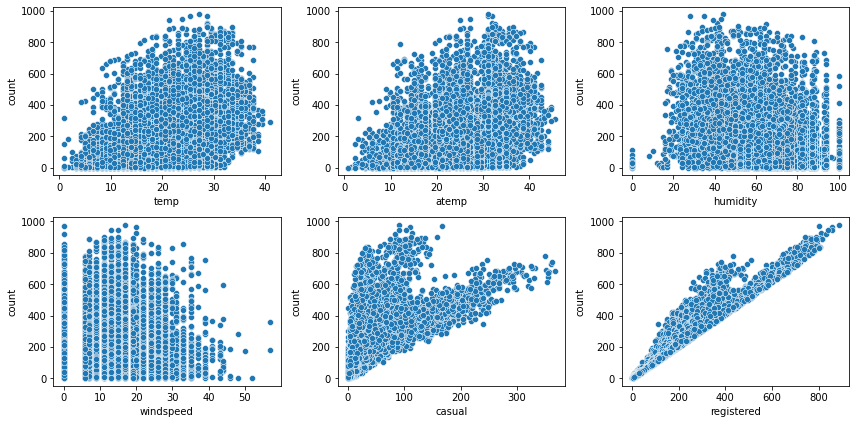

In [177]:
# plotting numerical variables againt count using scatterplot
num_cols = yulu.select_dtypes(['int','float']).columns
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
index = 0
for row in range(2):
    for col in range(3):
        sb.scatterplot(data=yulu, x=num_cols[index], y='count',ax=axis[row, col])
        index += 1
plt.tight_layout()
plt.show()

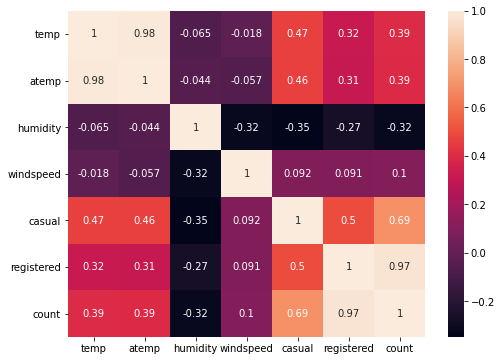

In [188]:
plt.figure(figsize=(8,6))
sb.heatmap(yulu.corr(),annot=True)
plt.show()

Observations:
From the above Correlation heatmap and scatter plots, it can be observed that:
1. Registered Counts and Counts are highly correlated.
2. Casual counts and over all counts also have comparatively high correlation.
3. Humidity and Count are negatively correlated.
4. Rest of the numerical features are corelated to count positively, ranging from 0.1 to 0.97, windspeed being most weakly correlated.

# HYPOTHESIS TESTING

### 1. 2-Sample T-Test to check if Working Day has an effect on the number of electric cycles rented

In [ ]:
# Null Hypothesis: Working day has no effect on the number of cycles being rented.
# Alternate Hypothesis: Working day has effect on the number of cycles being rented.
# Significance level (alpha): 0.05
# We will use the 2-Sample T-Test to test the hypothess defined above
group1 = yulu[yulu['workingday']==0]['count'].values
group2 = yulu[yulu['workingday']==1]['count'].values

In [205]:
# performing the levene's test to confirm equal variance
# Null hypothesis (H₀): there is no significant difference in the variances 
# of the populations from which the samples were drawn.
# Alternative hypothesis (H₁): there is a statistically significant 
# difference in the variances between the populations.
from scipy.stats import levene
stat,pval = levene(group1,group2)
if pval < 0.05:
    print(f'with pvalue as {pval}, it can be concluded that, the two groups have statistically different variances')
else:
    print(f'with pvalue as {pval}, it can be concluded that, the two groups have statistically similar variances')

with pvalue as 0.9437823280916695, it can be concluded that, the two groups have statistically similar variances


In [208]:
from scipy.stats import ttest_ind
stat,pval=ttest_ind(a=group1, b=group2, equal_var=True)
if pval < 0.05:
    print(f'with pvalue as {pval}, it can be concluded that, the working day has impact on counts of rented bikes')
else:
    print(f'with pvalue as {pval}, it can be concluded that, the working day has no impact on counts of rented bikes')

with pvalue as 0.22644804226361348, it can be concluded that, the working day has no impact on counts of rented bikes


### 2. ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season

In [223]:
# Null Hypothesis: Number of cycles rented is similar in different weather and
# season.
# Alternate Hypothesis: Number of cycles rented is not similar in different
# weather and season.
# Significance level (alpha): 0.05
# Creating respective groups
groups = []
for i in yulu['weather'].unique():
    groups.append(yulu[yulu['weather']==i]['count'].values)
for i in yulu['season'].unique():
    groups.append(yulu[yulu['season']==i]['count'].values)

##### Confirming the Assumptions necessary for performing an Annova test

###### First Assumption: Gaussian

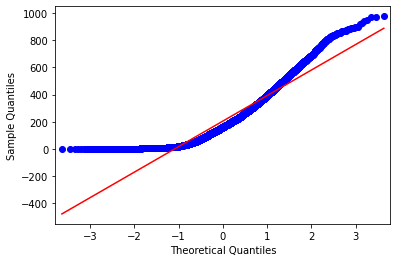

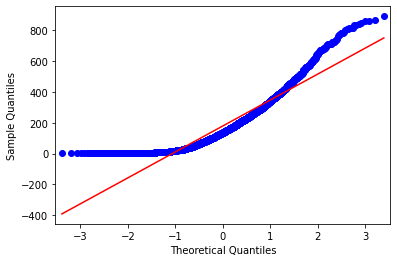

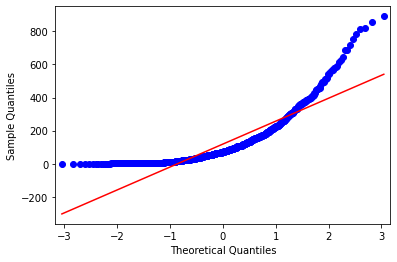

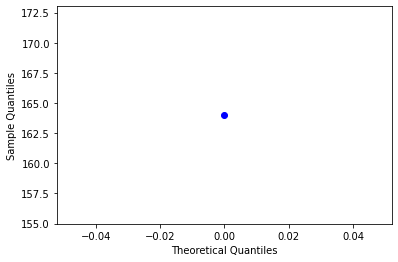

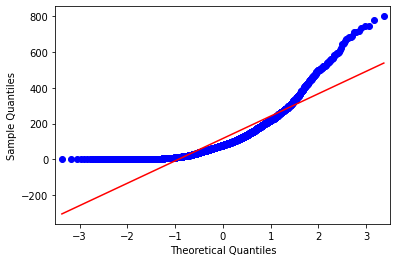

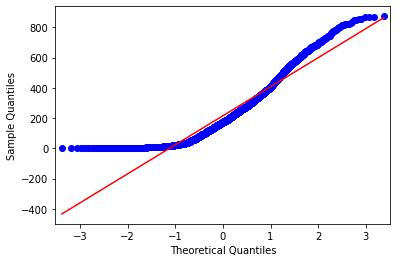

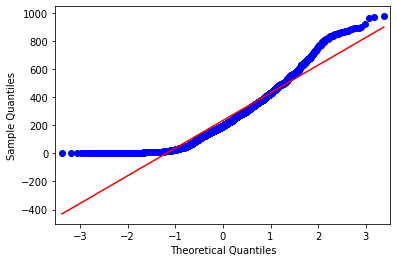

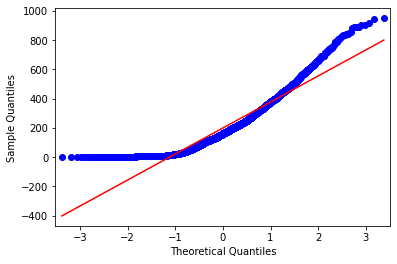

In [232]:
for feat in range(len(groups)):
    sm.qqplot(groups[feat],line='s')

It can be observed from above that, none of the groups are following a normal distribution.

##### Second Assumption: Data is independent

##### Third Assumption: Equal Variance

In [237]:
# Performing Levene's test to check for equal variances

#Null Hypothesis: Variances are similar in different weather and season.
#Alternate Hypothesis: Variances are not similar in different weather and season.
#Significance level (alpha): 0.05
levene_stat, p_value = levene(groups[0],groups[1],groups[2],groups[3],groups[4],groups[5],groups[6],groups[7])
print(p_value)
if p_value < 0.05:
    print("Reject the Null hypothesis.Variances are not equal")
else:
    print("Fail to Reject the Null hypothesis.Variances are equal")

3.463531888897594e-148
Reject the Null hypothesis.Variances are not equal


As we can see from above,the variances are not equal, hence the third assumption is also not fulfilled. 

#### As None of assumptions for an Annova test have been fulfilled, we shall perform a Kruskal Test.

In [238]:
from scipy.stats import kruskal
kruskal_stat, p_value = kruskal(groups[0],groups[1],groups[2],groups[3],groups[4],groups[5],groups[6],groups[7])
if p_value<0.05:
    print("Since p-value is less than 0.05, we reject the null hypothesis, And hence conclude that the Seasons and Weather dont have similar impact on count")
else:
    print("Since p-value is greater than 0.05, we fail to reject the null hypothesis, And hence conclude that the Seasons and Weather have similar impact on count")


Since p-value is less than 0.05, we reject the null hypothesis, And hence conclude that the Seasons and Weather dont have similar impact on count


### 3. Chi-square test to check if Weather is dependent on the season

In [239]:
# Null Hypothesis (H0): Weather is independent of the season
# Alternate Hypothesis (H1): Weather is not independent of the season
# Significance level (alpha): 0.05
table = pd.crosstab(yulu['season'], yulu['weather'])
print("Observed values:")
table

Observed values:


weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [245]:
from scipy.stats import chi2_contingency
stat,pval,dof,tab = chi2_contingency(table)

if pval <= 0.05:
    print(f"Since p-value, ie, {pval} is less than the alpha 0.05, We reject the Null Hypothesis.\nHence Weather is dependent on the season.")
else:
    print(f"Since p-value, ie, {pval} is greater than the alpha 0.05, We fail to reject the Null Hypothesis, hence Weather and Season are independent")

Since p-value, ie, 1.549925073686492e-07 is less than the alpha 0.05, We reject the Null Hypothesis.
Hence Weather is dependent on the season.


## Insights
1. In summer and fall seasons more bikes are rented as compared to other seasons.
2. Whenever its not holiday more bikes are rented.
3. It is also clear from the workingday also that whenever day is not holiday or weekend, slightly more bikes are rented.
4. Whenever there is rain, thunderstorm, snow or fog, there were less bikes rented.
5. Anova test assumption fails in the case study. As neither variance are equal and disb of variables are normal. Variance equality test was done using Levene’s test, which helps reject assumption for one way annova.
6. Normal distribution check was done by using QQ plot test.
7. Practical data almost never follows normal disb hence mention of non parametric test like Krushkal Welch test.
8. Detection of outlier data using IQR principles, visualized using boxplots.

## Recommendations
1. In summer and fall seasons the company should have more bikes in stock.
2. With a significance level of 0.05, workingday has no effect on the number of bikes being rented.
3. Yulu should try to attract more customers on working days and try to make it as an alternate to work travel mode. Special peak timing offers and high availabilty of yulu bikes will contribute to the increase in bookings.
4. Using anova test, taking alpha as 5%, we still see pvalue<0.05 hence we reject the HO and accept ha that is yes the weather has affect on the number of cycles rented out. Yulu needs to pay attention on the weather conditions to increase it's bike active users. Weather and customer profiling will help to come up with new product features on yulu.
5. Using anova, taking alpha as 5%, we still see pvalue<0.05 hence we reject the HO and accept ha that is yes the season has affect on the number of cycles rented out. Yulu needs to focus more on the seasonal offerings of the bikes to make more active users retention. Student discounts in summer and school hours will also attract new customer base.
6. Using chi square test, the p value is very less than alpha at 5%, we reject the h0 and accept h1. Season has some influence on the weather, We say it with high confidence. Use of meterological features will help in boosting the bookings.